In [228]:
import json
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#with open('reviews.json') as f:
    #reviews = f.read().strip().split("\n")#df = pd.read_json('reviews.json', lines=True) one time load to data frame
    

In [216]:
review_list = pd.read_json('reviews.json', lines=True) 

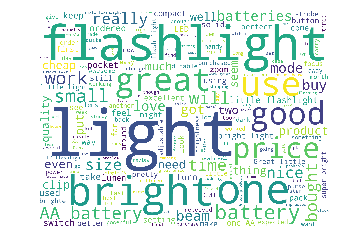

In [286]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=2000, height=1500, margin=2).generate(' '.join(review_list['text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [217]:
len(review_list)

1328

In [219]:
review_list

,date,name,name_tag,score,text
0,2012-11-03,kkjjn,no tag,4,Great for price but unfortunately doesn't have...
1,2012-11-05,Lantana Al,TOP 500 REVIEWER,4,I bought two of these. They are nice little li...
2,2012-11-06,l2,no tag,2,I bought one of these. Doesn't seem any bright...
3,2012-11-07,OhGoodieMan,no tag,5,I have 4 of these.All work great and very well...
4,2012-11-07,Jacob Anderson,no tag,4,I would say this light is somewhere in the nei...
5,2012-11-08,litezen,no tag,5,"I normally don't bother to review stuff, but I..."
6,2012-11-08,A. Rizzo,no tag,5,I have the older version of this flash light a...
7,2012-11-10,Justin,no tag,5,"The specs on this light say ""up to 300 lumens""..."
8,2012-11-10,Ron,no tag,4,"First, shipping is ridiculously slow. Even it ..."
9,2012-11-12,John,no tag,5,Very small and bright using one AA battery. Ve...


In [220]:
pd.value_counts(review_list['name_tag'])#this is the value counts for reviewer name tag, if the reviewer have tag,which means 
#they must contribute a lot in amazon review

no tag                         1314
TOP 500 REVIEWER                  3
Top Contributor: Watches          2
Top Contributor: Pets             2
Top Contributor: Fishing          1
Top Contributor: Camping          1
HALL OF FAMETOP 10 REVIEWER       1
VINE VOICE                        1
Top Contributor: Cooking          1
TOP 1000 REVIEWER                 1
TOP 100 REVIEWER                  1
Name: name_tag, dtype: int64

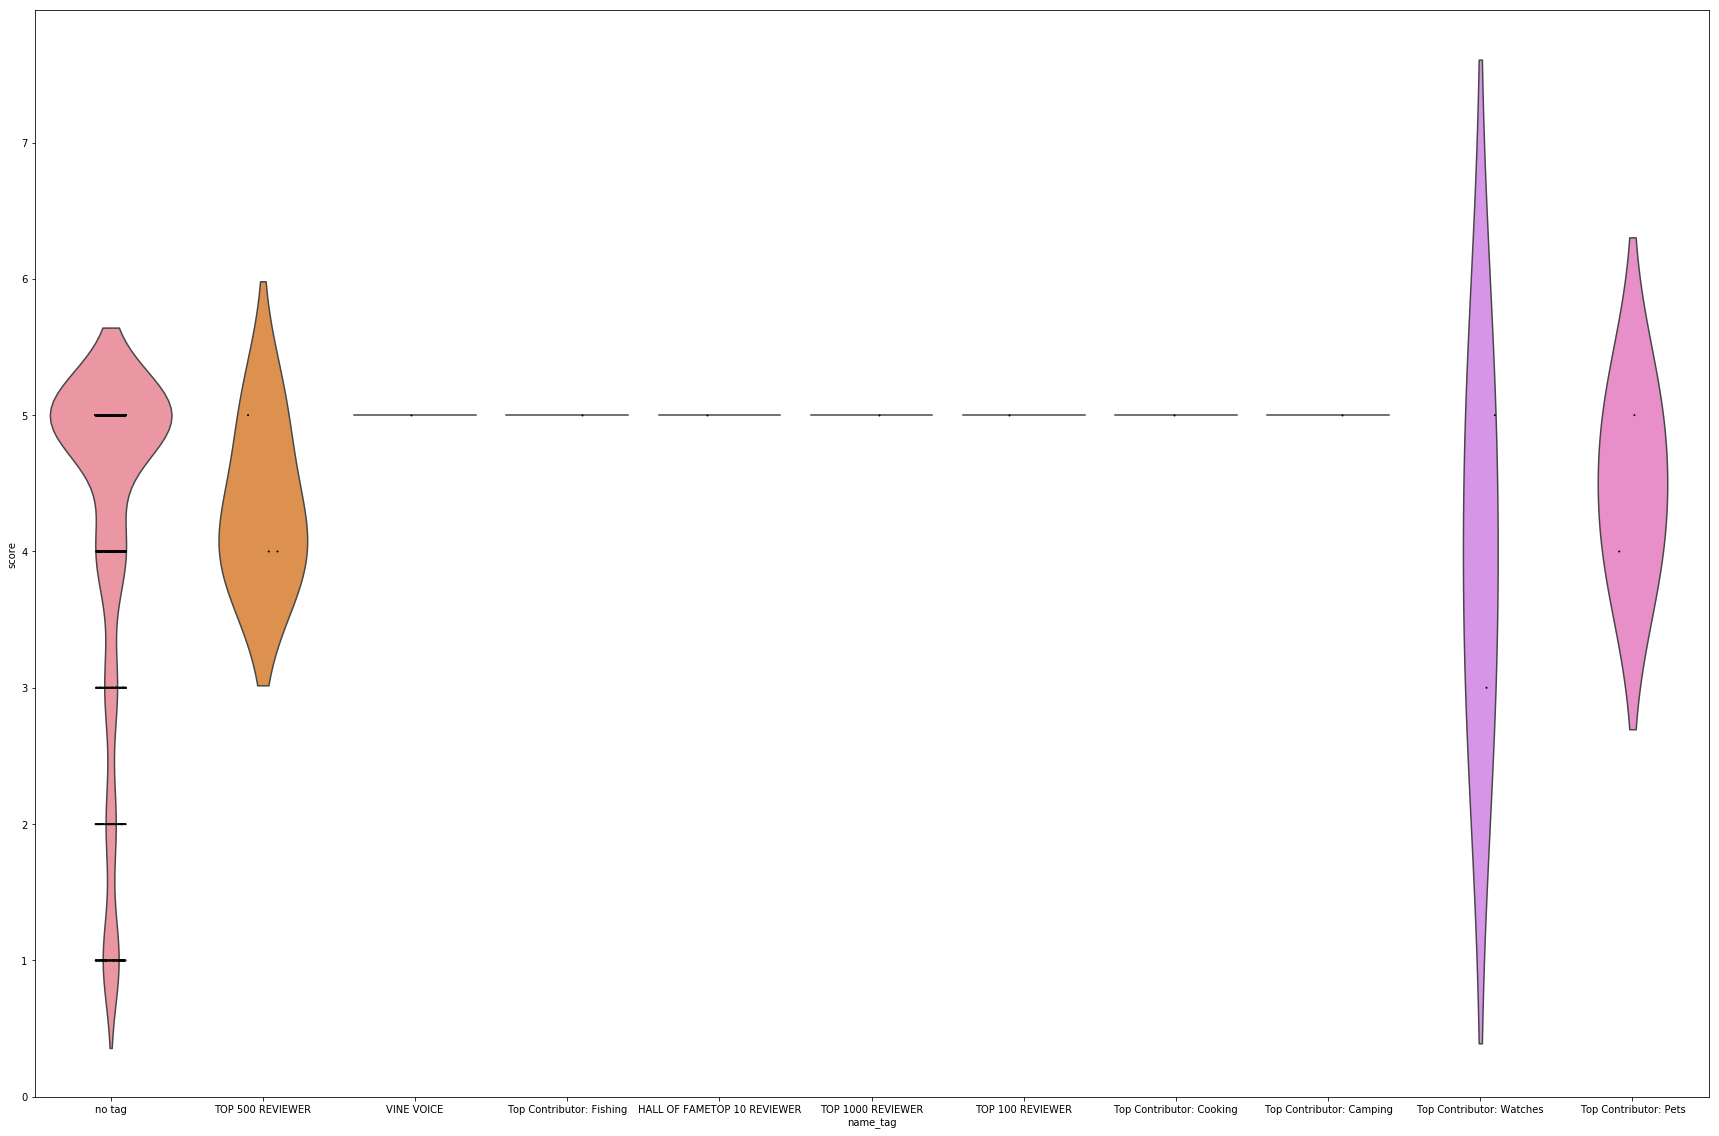

In [234]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
sns.violinplot(data=review_list, x='name_tag', y='score', inner=None, bw='silverman')
sns.stripplot(x='name_tag', y='score', data=review_list, jitter=True, color='white', 
              linewidth=1, edgecolor='black', size=1)

#### from this scatter plot, we can see that most people have tag give this product high score, which mean I can add a variable in model, when the tag is top 500 reviewer, specify a binary variable is 1, but the samples for reviewer who have tag name is too low, which may not contribute much is this model

In [221]:
#detect fake reviews
review_list['text length'] = review_list['text'].apply(lambda x: len(x.split()))
review_list['name length'] = review_list['name'].apply(lambda x: len(x))

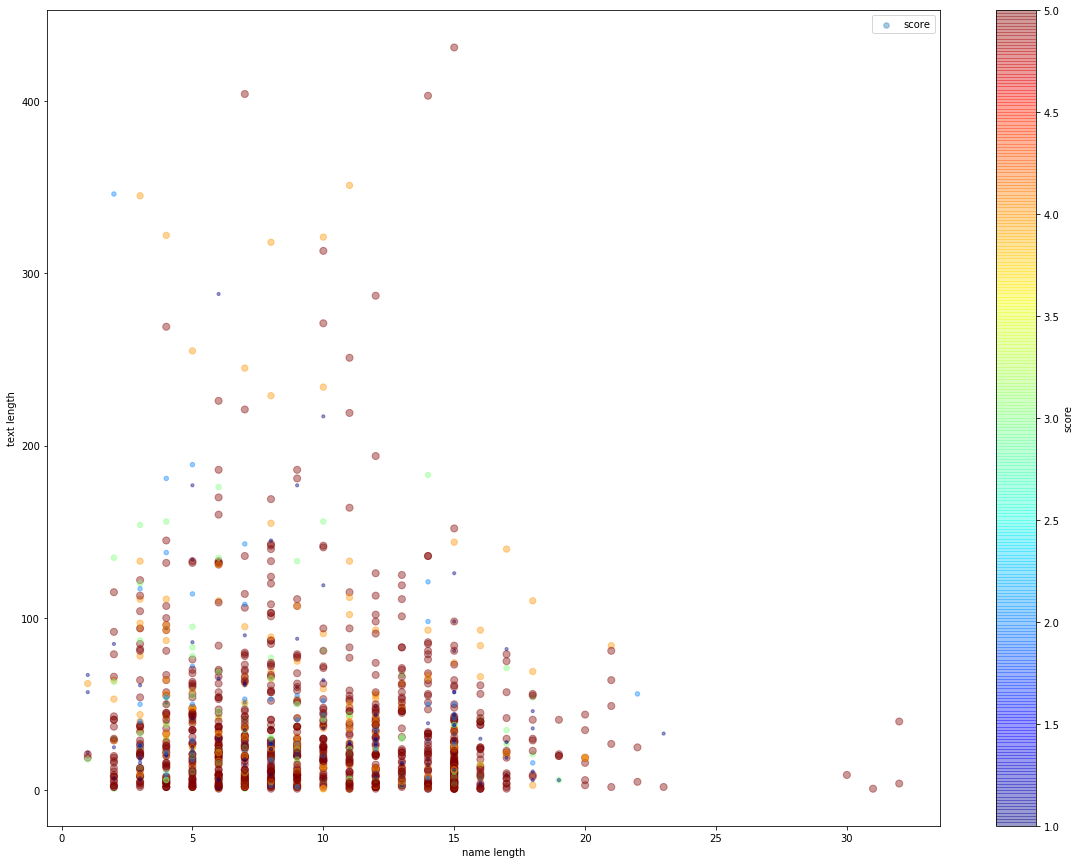

In [239]:
review_list.plot(kind="scatter", x='name length', y='text length', alpha=0.4,
    s=review_list['score']*10, label="score", figsize=(20,15),
    c='score', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


In [7]:
full_star_review = review_list[(review_list.score == 5.0)]

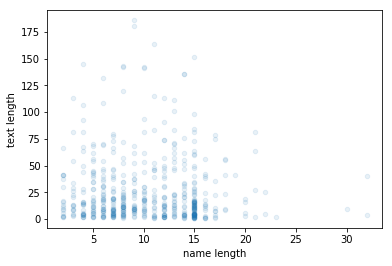

In [195]:
full_star_review.plot.scatter(x='name length', y='text length',alpha = 0.1)

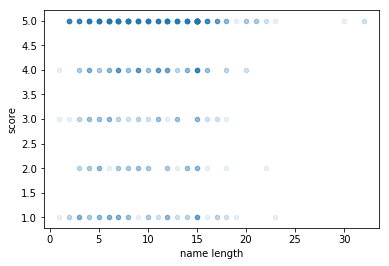

In [9]:
review_list.plot.scatter(x='name length', y='score',alpha = 0.1)

### from this two scatter plot, there are some reviews that have low name length, low text length and high score

In [242]:
review_list[(review_list['name length'] == 2) & (review_list['score'] == 5)]

,date,name,name_tag,score,text,text length,name length
68,2012-12-15,KC,no tag,5,Shipment is very fast and on time. The price ...,20,2
81,2012-12-21,OB,no tag,5,I took this flashlight to Costa Rica with me a...,29,2
167,2013-03-04,PB,no tag,5,"Although I'd read good reviews of these, I did...",115,2
300,2013-10-31,Ed,no tag,5,"It is a powerful, acceptable workmanship flash...",19,2
373,2014-03-31,AB,no tag,5,"Fantastic flashlight for the price. Note, the...",92,2
383,2014-07-01,SW,no tag,5,I have bought ~40 of these and give them away ...,79,2
447,2015-09-30,HZ,no tag,5,"fantastic, the description is exactly like its...",8,2
509,2017-03-01,KR,no tag,5,love them,2,2
628,2017-05-15,JQ,no tag,5,"Great little flashlight for nightstand, car or...",8,2
631,2017-05-15,VK,no tag,5,Very nice-was a gift. Fast shipping,6,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010DB61228D0>,
      dtype=object)

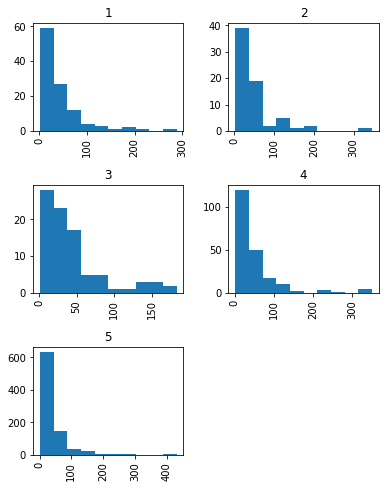

In [245]:
review_list['text length'].hist(bins = 10,by = review_list['score'], figsize = (6,8))

#### from the histograms above, we can find there are plenty of reviews less than 50 words, I think build a model seperate the word length will make the model better

In [226]:
pd.value_counts(review_list['score'])

5    853
4    208
1    110
3     88
2     69
Name: score, dtype: int64

In [227]:
review_list['text length'].describe()

count    1328.000000
mean       39.295934
std        49.227680
min         1.000000
25%        10.000000
50%        24.000000
75%        48.000000
max       431.000000
Name: text length, dtype: float64

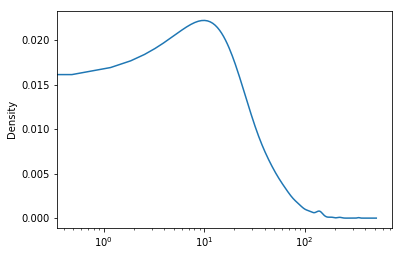

In [13]:
review_list['text length'].plot(kind='kde', logx=True)

#### most reviews' length are less than 100 words

#### feature extraction use spacy to get noun propn adj verb

In [263]:
from sklearn.base import BaseEstimator, TransformerMixin

In [264]:
import spacy

nlp = spacy.load('en')

In [265]:
class PartOfSpeechFilter(BaseEstimator, TransformerMixin):
    def __init__(self, pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences 

In [266]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True, stop_words='english',)
posf = PartOfSpeechFilter()


In [267]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer(lowercase=True, stop_words='english'))
                    ])
pipeline.set_params(**{'posf__stop_words': None})
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)


Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
          stop_words=None)), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_...   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None))])

In [268]:
preproc_reviews = pipeline.fit_transform(review_list.text)

In [269]:
preproc_reviews 

<1328x240 sparse matrix of type '<class 'numpy.int64'>'
	with 12793 stored elements in Compressed Sparse Row format>

In [270]:
sum_across_rows = preproc_reviews.sum(axis=1)
print('Shape of result: ', sum_across_rows.shape)

Shape of result:  (1328, 1)


In [272]:
sum_across_rows[:10]# this shows every review's number of words after select

matrix([[  9],
        [ 24],
        [  4],
        [ 13],
        [ 19],
        [101],
        [ 21],
        [ 38],
        [ 14],
        [ 14]], dtype=int64)

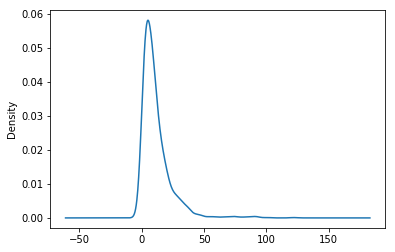

In [273]:
pd.Series(sum_across_rows.A1).plot(kind='kde')#Return self as a flattened array

In [274]:
sum_down_columns = preproc_reviews.sum(axis=0)
sum_down_columns.shape

(1, 240)

In [275]:
pipe_cv = pipeline.named_steps['cv']
counts_per_word = list(zip(pipe_cv.get_feature_names(), sum_down_columns.A1))

In [277]:
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:30]

[('light', 883),
 ('flashlight', 710),
 ('pron', 664),
 ('bright', 613),
 ('battery', 503),
 ('great', 393),
 ('use', 380),
 ('good', 361),
 ('work', 354),
 ('price', 257),
 ('buy', 250),
 ('small', 242),
 ('little', 230),
 ('aa', 226),
 ('beam', 154),
 ('time', 151),
 ('mode', 150),
 ('size', 144),
 ('nice', 130),
 ('focus', 129),
 ('make', 125),
 ('order', 122),
 ('like', 117),
 ('need', 117),
 ('product', 116),
 ('quality', 115),
 ('clip', 111),
 ('pocket', 107),
 ('love', 104),
 ('turn', 104)]

#### flashlight should be removed, because these reviews are all about flashlight remove pron,because for word i, it, its, t.lemma_ will return pron

In [278]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer(lowercase=True, stop_words='english'))
                   ])

pipeline.set_params(**{'posf__stop_words': {'flashlight','-PRON-'}})
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)

preproc_reviews = pipeline.fit_transform(review_list.text)

In [279]:
preproc_reviews.shape

(1328, 238)

In [280]:
sum_down_columns = preproc_reviews.sum(axis=0)
sum_down_columns.shape

(1, 238)

In [281]:
counts_per_word = list(zip(pipe_cv.get_feature_names(), sum_down_columns.A1))
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:10]

[('life', 883),
 ('bright', 613),
 ('battery', 503),
 ('good', 393),
 ('type', 380),
 ('glove', 361),
 ('wide', 354),
 ('press', 257),
 ('buy', 250),
 ('size', 242)]

#### build a simple logistic regression model, test the perform, combine with chi2 test to get word importance in each class

In [288]:
X = preproc_reviews
y = review_list.score.values

In [289]:
from sklearn.linear_model import LogisticRegression

In [290]:
lr = LogisticRegression()

lr.fit(preproc_reviews, review_list.score.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [291]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(review_list.score.values, lr.predict(preproc_reviews))

In [292]:
conf_matrix

array([[ 63,   0,   0,   2,  45],
       [  8,  29,   2,   2,  28],
       [  1,   2,  34,   2,  49],
       [  1,   1,   1,  69, 136],
       [  1,   2,   1,  15, 834]], dtype=int64)

In [306]:
# a much prettier representation of the confusion matrix
# props to this guy: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

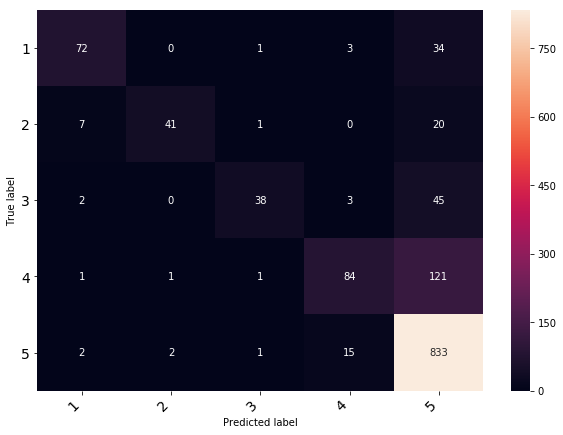

In [307]:
print_confusion_matrix(conf_matrix, ['1', '2','3','4','5'])

#### from this confusion matrix, the model not perfrom well in classify the score 4,3. I think the main reason is the imblanced data

In [293]:
lr.score(preproc_reviews, review_list.score.values)

0.7748493975903614

In [294]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [295]:
fs_chi2 = SelectKBest(chi2, k=150)
X_kbest = fs_chi2.fit_transform(preproc_reviews.toarray(), review_list.score.values)

In [296]:
X_kbest.shape

(1328, 150)

In [297]:
lr.fit(X_kbest, review_list.score.values)
lr.score(X_kbest, review_list.score.values)

0.7417168674698795

In [298]:
from sklearn.model_selection import cross_val_score

In [299]:
scores = cross_val_score(lr, preproc_reviews, review_list.score.values, cv=10, #sklearn does stratified sampling default
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6524325190589291

In [300]:
scores = cross_val_score(lr, X_kbest, review_list.score.values, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6666111055941534

#### from this two cross validation result , use chi2 test get the top 150 words will reduce the overfitting

In [301]:
#from the cross validation mean scroe we can find the score is not good in test set. the default solver for multi-class logistic regression is
# one vs rest(set a label is 1 and others is 0), use the multi-nominal to see if there can be any improvement
lr1 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [302]:
lr1.score(X, y)

0.8042168674698795

In [303]:
scores = cross_val_score(lr1, X, y, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6328762289682278

In [304]:
conf_matrix = confusion_matrix(y, lr1.predict(X))
conf_matrix

array([[ 72,   0,   1,   3,  34],
       [  7,  41,   1,   0,  20],
       [  2,   0,  38,   3,  45],
       [  1,   1,   1,  84, 121],
       [  2,   2,   1,  15, 833]], dtype=int64)

In [50]:
scores = cross_val_score(lr1, X_kbest, y, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6835813024255959

#### I delete stop words in pervious data, maybe some useful words also delete

In [308]:
pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer(lowercase=True))
                   ])

pipeline.set_params(**{'posf__stop_words': {'flashlight','-PRON-'}})
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)

preproc_reviews_withstop = pipeline.fit_transform(review_list.text)# get the data with the stop words not dropped

In [309]:
preproc_reviews_withstop.shape

(1328, 286)

In [310]:
lr.fit(preproc_reviews_withstop, y)
lr.score(preproc_reviews_withstop, y)

0.8125

In [311]:
lr1.fit(preproc_reviews_withstop, y)
lr1.score(preproc_reviews_withstop, y)

0.8433734939759037

#### the score improved which means the stop words deleted by countvectorizer are useful

In [312]:
scores = cross_val_score(lr, preproc_reviews_withstop, y, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6418250589620738

In [313]:
scores = cross_val_score(lr1,preproc_reviews_withstop, y, cv=10, 
                        scoring= 'accuracy',
                        
                       )
scores.mean()

0.6388287662039034

##### from the score above use the word with stop words not dropped not improve the score much, but the accuacy score in all data is improved from 80% to 84%, which meas have overfitting problem. Next, I will use gridcv and pipeline to find the best number of feature using cni2 test and parameter in logistic regression.

In [314]:
import numpy as np

In [315]:
from sklearn.model_selection import GridSearchCV

In [316]:
c_range = np.linspace(0.1, 1e5,10 )
tol_range = [1e-4,1e-3,1e-2,1e-1]


In [317]:
#use grid search to find the best parameter
param_grid = dict(penalty = ['l1','l2'],
                  C = c_range,
                  multi_class = ['multinomial','ovr'],
                  solver = ['saga'],
                  class_weight =[None,'balanced'],
                  tol = tol_range
                 
                 )

In [318]:
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, n_jobs=3,cv =10,scoring= 'accuracy')

In [319]:
grid_search.fit(preproc_reviews_withstop, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-01, 1.11112e+04, 2.22223e+04, 3.33334e+04, 4.44445e+04,
       5.55556e+04, 6.66667e+04, 7.77778e+04, 8.88889e+04, 1.00000e+05]), 'multi_class': ['multinomial', 'ovr'], 'solver': ['saga'], 'class_weight': [None, 'balanced'], 'tol': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [320]:
grid_search.best_params_

{'C': 0.1,
 'class_weight': None,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'saga',
 'tol': 0.01}

In [321]:
grid_search.cv_results_['mean_test_score'].max()

0.6716867469879518

In [322]:
lr3 = LogisticRegression(C =44444.49999999999, multi_class ='multinomial' )#because only saga can handle l1 penalty

In [323]:
param_grid2= dict(solver = ['newton-cg','sag','saga','lbfgs'],penalty = ['l2'])#find the best solver
grid_search_solver = GridSearchCV(lr3, param_grid=param_grid2, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_solver.fit(preproc_reviews_withstop, y)
grid_search_solver.best_params_#saga still is the best splver

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'penalty': 'l2', 'solver': 'saga'}

In [324]:
param_grid3= dict(solver = ['saga'],penalty = ['l1','l2'])#find the best penalty
grid_search_penalty = GridSearchCV(lr3, param_grid=param_grid2, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_penalty.fit(preproc_reviews_withstop, y)
grid_search_penalty.best_params_#select penalty as l2

C:\Users\TEMP\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'penalty': 'l2', 'solver': 'saga'}

In [343]:
lr4 = LogisticRegression(C =0.1, multi_class ='multinomial',solver= 'saga',penalty = 'l2',tol = 0.01,class_weight = None )

In [344]:
k_range = np.arange(2,210,5)
k_range_score = []
for i in k_range:
    fs_chi = SelectKBest(chi2, k=i)
    X_kbest = fs_chi.fit_transform(preproc_reviews_withstop,y)
    scores = cross_val_score(lr4,X_kbest, y, cv=10, 
                        scoring= 'accuracy')
    k_range_score.append(scores.mean())
    

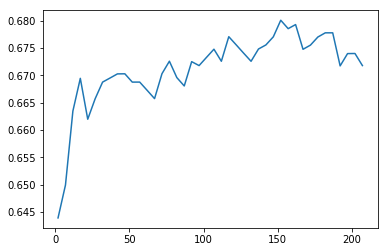

In [345]:
plt.plot(k_range ,k_range_score)

In [346]:
k_range[np.argmax(k_range_score)]


152

## when i just use one year data, the score can be 71% , now it only can be 68%

#### finally, choose top 152 element by chi2 test, set logistic regression parameter as C =0.1, multi_class ='multinomial',solver= 'saga',penalty = 'l2',tol = 0.01,class_weight = None, the model can reach 68% accuracy

### SVM part

In [347]:
from sklearn.svm import SVC
svc = SVC()


In [348]:
svc.fit(preproc_reviews_withstop, y)
svc.score(preproc_reviews_withstop, y)

0.6438253012048193

In [349]:

scores = cross_val_score(svc, preproc_reviews_withstop, y, cv=10, n_jobs=-1,scoring= 'accuracy')
scores.mean()

0.6423562971811084

### select best kernel and penalty

In [351]:
param_svc= dict(kernel = ['linear','poly', 'rbf', 'sigmoid'])#find the best kernel ,C = c_range
grid_search_solver = GridSearchCV(svc, param_grid=param_svc, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_solver.fit(preproc_reviews_withstop, y)
grid_search_solver.best_params_

{'kernel': 'rbf'}

In [368]:
scores = cross_val_score(SVC(**{'C': 0.1,'kernel': 'rbf'}), preproc_reviews_withstop, y, cv=10, n_jobs=-1,scoring= 'accuracy')
scores.mean()

0.6423562971811084

In [362]:
k_range = np.arange(2,210,5)
k_range_score = []
for i in k_range:
    fs_chi = SelectKBest(chi2, k=i)
    X_kbest = fs_chi.fit_transform(preproc_reviews_withstop,y)
    scores = cross_val_score(SVC(**{'C': 0.1, 'kernel': 'linear'}),X_kbest, y, cv=10, 
                        scoring= 'accuracy')
    k_range_score.append(scores.mean())

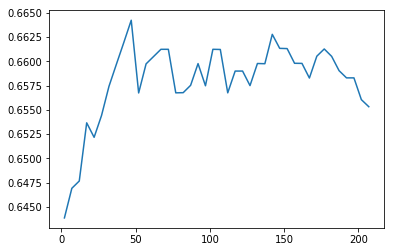

In [363]:
plt.plot(k_range ,k_range_score)

In [364]:
k_range[np.argmax(k_range_score)]

47

### because svm donesn't support build in regularization, i will use LinearSVC

#### the code show below is the parameter tuning by original data(one year review)

In [109]:
from sklearn.svm import LinearSVC

In [111]:
lin_svc = LinearSVC()

In [117]:
param_linearsvc= dict(dual=[False],
                      #l1 didn't support hinge
                      penalty = ['l1','l2'],
                      multi_class = ['crammer_singer','ovr'],
                      C = c_range,
                      class_weight =[None,'balanced'],
                      tol = tol_range)
grid_search_solver = GridSearchCV(lin_svc, param_grid=param_linearsvc, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_solver.fit(preproc_reviews_withstop, y)
grid_search_solver.best_params_

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'multi_class': 'crammer_singer',
 'penalty': 'l1',
 'tol': 0.0001}

In [118]:
scores = cross_val_score(LinearSVC(**{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'multi_class': 'crammer_singer',
 'penalty': 'l1',
 'tol': 0.0001}), preproc_reviews_withstop, y, cv=10, n_jobs=-1,scoring= 'accuracy')
scores.mean()

0.7011694801925841

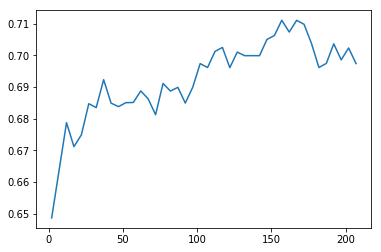

In [119]:
k_range = np.arange(2,210,5)
k_range_score = []
for i in k_range:
    fs_chi = SelectKBest(chi2, k=i)
    X_kbest = fs_chi.fit_transform(preproc_reviews_withstop,y)
    scores = cross_val_score(LinearSVC(**{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'multi_class': 'crammer_singer',
 'penalty': 'l1',
 'tol': 0.0001}),X_kbest, y, cv=10, 
                        scoring= 'accuracy')
    k_range_score.append(scores.mean())
plt.plot(k_range ,k_range_score)

In [120]:
k_range[np.argmax(k_range_score)]

157

#### use imblance learn package to make sample balance

In [121]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.base import SamplerMixin
from imblearn.utils import hash_X_y

In [372]:

pipe = make_pipeline(RandomOverSampler(random_state=0), svc)
pipe.fit(preproc_reviews_withstop, y)
pipe.score(preproc_reviews_withstop, y)

0.7161144578313253

In [373]:
scores = cross_val_score(pipe,preproc_reviews_withstop, y, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.5795222969914599

In [374]:

pipe = make_pipeline(SMOTE(random_state=0,kind='svm'), LinearSVC(penalty='l1',dual=False,C=10,multi_class= 'crammer_singer'))
pipe.fit(preproc_reviews_withstop, y)
pipe.score(preproc_reviews_withstop, y)

0.8998493975903614

In [383]:
pipe = make_pipeline(SMOTE(random_state=0,kind='svm'), SVC(C = 100))
pipe.fit(preproc_reviews_withstop, y)
pipe.score(preproc_reviews_withstop, y)

0.8923192771084337

In [384]:
scores = cross_val_score(pipe,preproc_reviews_withstop, y, cv=10, 
                        scoring= 'accuracy')
scores.mean()


0.5748686788706457

In [375]:
scores = cross_val_score(pipe,preproc_reviews_withstop, y, cv=10, 
                        scoring= 'accuracy')
scores.mean()


0.5332667891585037

In [378]:

pipe = make_pipeline(ADASYN(random_state=0), LinearSVC())
pipe.fit(preproc_reviews_withstop, y)
pipe.score(preproc_reviews_withstop, y)

0.7311746987951807

In [380]:
scores = cross_val_score(pipe,preproc_reviews_withstop, y, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.4915563628398609

#### after try some over sample method, only the SMOTE method show a good fit in all the sample, but perform very bad in cross validation

In [385]:
from imblearn.under_sampling import RandomUnderSampler

In [386]:
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(preproc_reviews_withstop, y)

In [387]:
pd.value_counts(y_resampled)

5    69
4    69
3    69
2    69
1    69
dtype: int64

In [389]:
scores = cross_val_score(LinearSVC(),X_resampled, y_resampled, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.3661904761904761

#### by using undersampling the sample is too small, which make the multi-classification perfrom very bad

In [390]:
from imblearn.over_sampling import RandomOverSampler

In [391]:
rus = RandomOverSampler()
X_resampled, y_resampled = rus.fit_sample(preproc_reviews_withstop, y)

In [392]:
pd.value_counts(y_resampled)

3    853
2    853
5    853
1    853
4    853
dtype: int64

In [396]:
scores = cross_val_score(LinearSVC(),X_resampled, y_resampled, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.8568071135430916

In [406]:
scores = cross_val_score(lr4,X_resampled, y_resampled, cv=10, 
                        scoring= 'accuracy')
scores.mean()# use the tuned logistic regression model, the score now is  75.5%

0.7551244870041041

In [397]:
lin_svc.fit(X_resampled, y_resampled)
conf_matrix = confusion_matrix(y_resampled, lin_svc.predict(X_resampled))
conf_matrix

array([[832,   6,  11,   0,   4],
       [ 16, 837,   0,   0,   0],
       [ 24,   8, 770,  20,  31],
       [  5,  17,   6, 734,  91],
       [ 23,   9,  43, 102, 676]], dtype=int64)

#### after use oversample the original data, now confusion matrix shows the model perform bad in classify score 5

### random forest part

In [398]:
from sklearn.ensemble import RandomForestClassifier

In [399]:
rf = RandomForestClassifier()
rf.fit(preproc_reviews_withstop,y)
rf.score(preproc_reviews_withstop,y)

0.9759036144578314

In [400]:
scores = cross_val_score(rf,preproc_reviews_withstop,y, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.6167930839271604

In [401]:
scores = cross_val_score(rf,X_resampled, y_resampled, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.9313351573187415

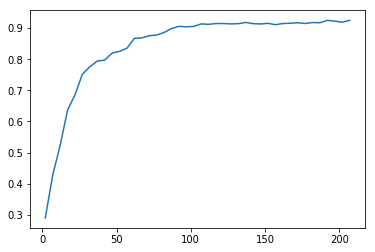

In [402]:
k_range = np.arange(2,210,5)
k_range_score = []
for i in k_range:
    fs_chi = SelectKBest(chi2, k=i)
    X_kbest = fs_chi.fit_transform(X_resampled, y_resampled)
    scores = cross_val_score(rf,X_kbest, y_resampled, cv=10, 
                        scoring= 'accuracy')
    k_range_score.append(scores.mean())
plt.plot(k_range ,k_range_score)

#### this graph shows the accuracy increase with number of variable

In [404]:
conf_matrix = confusion_matrix(y_resampled, rf.predict(X_resampled))
conf_matrix

array([[816,   0,   0,   0,  37],
       [ 21, 811,   0,   0,  21],
       [ 13,   0, 816,   0,  24],
       [  0,   0,  11, 792,  50],
       [  0,   0,   1,   3, 849]], dtype=int64)

#### in random forest, the model perform very well in score 5 

In [415]:
scores = cross_val_score(RandomForestClassifier(n_estimators = 30,min_samples_leaf = 1),X_resampled, y_resampled, cv=10, 
                        scoring= 'accuracy')
scores.mean()

0.9444541723666211

In [420]:
param_rf= dict(n_estimators = np.arange(10,110,10),
                     max_features = ['auto','sqrt','log2',None])
grid_search_solver = GridSearchCV(RandomForestClassifier(), param_grid=param_rf, n_jobs=3,cv =10,scoring= 'accuracy')
grid_search_solver.fit(X_resampled, y_resampled)
grid_search_solver.best_params_

{'max_features': 'log2', 'n_estimators': 90}

In [421]:
grid_search_solver.cv_results_['mean_test_score'].max()

0.958968347010551

In [423]:
rf2 = RandomForestClassifier(**{'max_features': 'log2', 'n_estimators': 90})
rf2.fit(X_resampled, y_resampled)
conf_matrix = confusion_matrix(y_resampled, rf2.predict(X_resampled))
conf_matrix

array([[841,   0,  12,   0,   0],
       [  0, 853,   0,   0,   0],
       [ 11,   0, 842,   0,   0],
       [  8,   0,  18, 827,   0],
       [ 10,   1,   7,   5, 830]], dtype=int64)

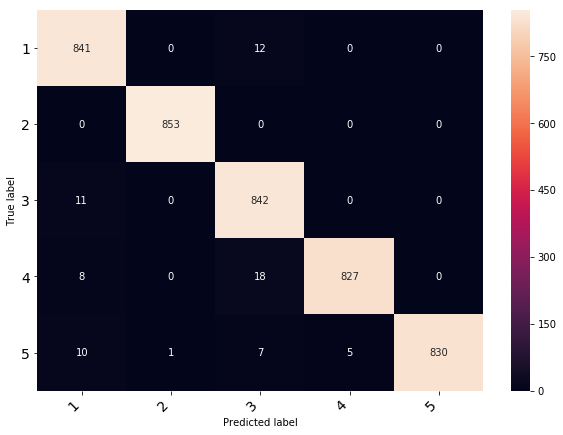

In [424]:
print_confusion_matrix(conf_matrix, ['1', '2','3','4','5'])

#### the score 5 not perform well but other class is better than original model

In [450]:
from sklearn.model_selection import cross_validate
scores = cross_validate(rf2, X_resampled, y_resampled, cv=10, 
                        scoring=['f1_micro', 'f1_macro', 'accuracy', 'precision_micro', 'recall_micro'],
                        return_train_score=True
                       )
scores

{'fit_time': array([0.82917809, 0.82118368, 0.833215  , 0.8392303 , 0.85627723,
        0.85529947, 0.84023428, 0.82920599, 0.83522129, 0.82419181]),
 'score_time': array([0.05514693, 0.05514693, 0.06015921, 0.05815554, 0.05614972,
        0.05612421, 0.05715251, 0.05614972, 0.05514669, 0.05514693]),
 'test_f1_micro': array([0.96511628, 0.96744186, 0.95581395, 0.94823529, 0.96941176,
        0.95294118, 0.94352941, 0.96470588, 0.96470588, 0.95764706]),
 'train_f1_micro': array([0.98226858, 0.98279009, 0.98305085, 0.98385417, 0.98307292,
        0.98359375, 0.98411458, 0.98385417, 0.98307292, 0.98307292]),
 'test_f1_macro': array([0.96501054, 0.96735623, 0.9555193 , 0.94670131, 0.96936421,
        0.95235315, 0.94243366, 0.96462879, 0.96432896, 0.95740043]),
 'train_f1_macro': array([0.98229142, 0.9828378 , 0.98309614, 0.98390345, 0.98311745,
        0.98360505, 0.98415284, 0.98390096, 0.98309481, 0.98309441]),
 'test_accuracy': array([0.96511628, 0.96744186, 0.95581395, 0.94823529, 0.9

In [435]:
def printscore(scores):
    score_frame = pd.DataFrame(columns = list(scores.keys()))
    for column in list(scores.keys()):
        score_frame[column] = scores[column]
    return score_frame

In [441]:
rf2_score = printscore(scores)
rf2_score

,fit_time,score_time,test_f1_micro,train_f1_micro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro
0,0.826173,0.057152,0.960465,0.982269,0.960260,0.982291,0.960465,0.982269,0.960465,0.982269,0.960465,0.982269
1,0.822186,0.061161,0.958140,0.982790,0.957991,0.982836,0.958140,0.982790,0.958140,0.982790,0.958140,0.982790
2,0.833216,0.055145,0.960465,0.983051,0.960308,0.983096,0.960465,0.983051,0.960465,0.983051,0.960465,0.983051
3,0.831209,0.056149,0.950588,0.983854,0.949241,0.983903,0.950588,0.983854,0.950588,0.983854,0.950588,0.983854
4,0.831237,0.054144,0.969412,0.983073,0.969351,0.983117,0.969412,0.983073,0.969412,0.983073,0.969412,0.983073
5,0.830206,0.055147,0.950588,0.983594,0.949904,0.983605,0.950588,0.983594,0.950588,0.983594,0.950588,0.983594
6,0.852267,0.056172,0.943529,0.984115,0.942078,0.984166,0.943529,0.984115,0.943529,0.984115,0.943529,0.984115
7,0.831211,0.056150,0.962353,0.983854,0.962250,0.983901,0.962353,0.983854,0.962353,0.983854,0.962353,0.983854
8,0.835221,0.056148,0.962353,0.983073,0.961633,0.983126,0.962353,0.983073,0.962353,0.983073,0.962353,0.983073
9,0.829204,0.055147,0.948235,0.983073,0.947680,0.983091,0.948235,0.983073,0.948235,0.983073,0.948235,0.983073


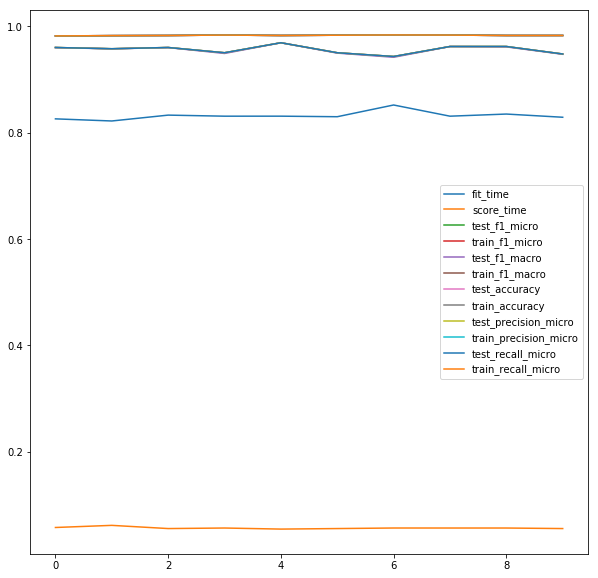

In [443]:
rf2_score.plot(figsize = (10,10))

In [444]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lin_svc, X_resampled, y_resampled, cv=10, 
                        scoring=['f1_micro', 'f1_macro', 'accuracy', 'precision_micro', 'recall_micro'],
                        return_train_score=True
                       )
svc_scores = printscore(scores)
svc_scores

,fit_time,score_time,test_f1_micro,train_f1_micro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro
0,0.577535,0.002006,0.839535,0.901173,0.831308,0.901226,0.839535,0.901173,0.839535,0.901173,0.839535,0.901173
1,0.580542,0.002031,0.816279,0.902477,0.814048,0.902592,0.816279,0.902477,0.816279,0.902477,0.816279,0.902477
2,0.582548,0.001003,0.860465,0.897523,0.857304,0.897860,0.860465,0.897523,0.860465,0.897523,0.860465,0.897523
3,0.583580,0.001000,0.821176,0.903646,0.814759,0.902804,0.821176,0.903646,0.821176,0.903646,0.821176,0.903646
4,0.580543,0.001982,0.877647,0.900000,0.873056,0.899145,0.877647,0.900000,0.877647,0.900000,0.877647,0.900000
5,0.594555,0.002006,0.877647,0.902865,0.875784,0.902016,0.877647,0.902865,0.877647,0.902865,0.877647,0.902865
6,0.588566,0.002006,0.863529,0.900781,0.862752,0.900071,0.863529,0.900781,0.863529,0.900781,0.863529,0.900781
7,0.629702,0.002000,0.870588,0.903385,0.869235,0.902587,0.870588,0.903385,0.870588,0.903385,0.870588,0.903385
8,0.593552,0.002005,0.872941,0.900000,0.868846,0.899011,0.872941,0.900000,0.872941,0.900000,0.872941,0.900000
9,0.596560,0.002006,0.877647,0.903646,0.874746,0.902702,0.877647,0.903646,0.877647,0.903646,0.877647,0.903646


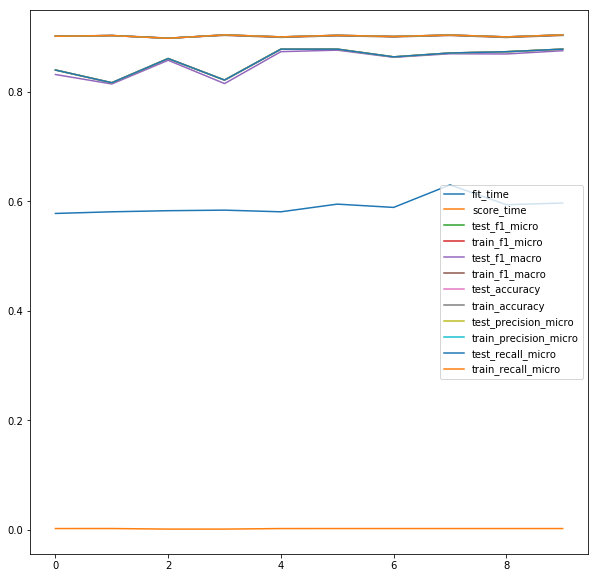

In [445]:
svc_scores.plot(figsize = (10,10))

In [446]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr4, X_resampled, y_resampled, cv=10, 
                        scoring=['f1_micro', 'f1_macro', 'accuracy', 'precision_micro', 'recall_micro'],
                        return_train_score=True
                       )
lr_scores = printscore(scores)
lr_scores

,fit_time,score_time,test_f1_micro,train_f1_micro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro
0,0.065177,0.002006,0.732558,0.795828,0.729196,0.795414,0.732558,0.795828,0.732558,0.795828,0.732558,0.795828
1,0.061136,0.002006,0.700000,0.792960,0.694562,0.792409,0.700000,0.792960,0.700000,0.792960,0.700000,0.792960
2,0.061137,0.001003,0.720930,0.791917,0.720397,0.791387,0.720930,0.791917,0.720930,0.791917,0.720930,0.791917
3,0.063168,0.002006,0.750588,0.795833,0.744760,0.794359,0.750588,0.795833,0.750588,0.795833,0.750588,0.795833
4,0.060159,0.002006,0.778824,0.788281,0.777339,0.786741,0.778824,0.788281,0.778824,0.788281,0.778824,0.788281
5,0.063167,0.002006,0.755294,0.801302,0.752089,0.799922,0.755294,0.801302,0.755294,0.801302,0.755294,0.801302
6,0.065172,0.002006,0.767059,0.794531,0.766250,0.792656,0.767059,0.794531,0.767059,0.794531,0.767059,0.794531
7,0.063166,0.002005,0.788235,0.796875,0.787158,0.795311,0.788235,0.796875,0.788235,0.796875,0.788235,0.796875
8,0.061163,0.002032,0.769412,0.793490,0.767785,0.791809,0.769412,0.793490,0.769412,0.793490,0.769412,0.793490
9,0.064171,0.001006,0.802353,0.793229,0.799001,0.791757,0.802353,0.793229,0.802353,0.793229,0.802353,0.793229


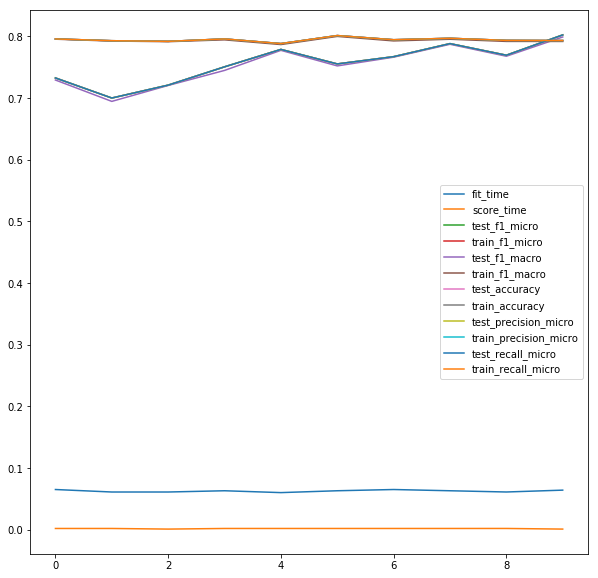

In [448]:
lr_scores.plot(figsize = (10,10))

# compare these three model, the random forest is the most accuracy and stable

In [453]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from scipy import interp
y = label_binarize(y_resampled, classes=[0, 1, 2,3,4,5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.5,
                                                    random_state=0)
classifier = OneVsRestClassifier(rf2)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'